# Upper Confidence Bound (UCB)

## Importing the libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [0]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [0]:
import math
N = 5000
d = 10
ads_selected = []
numbers_of_selections = [0] *d
sum_of_rewards = [0] *d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if(numbers_of_selections[i] > 0):
      average_reward = sum_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

## Visualising the results

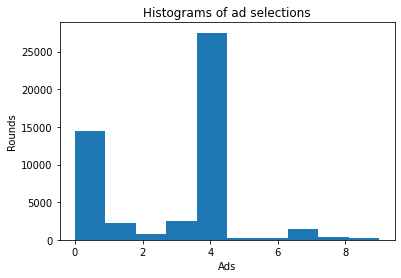

In [19]:
plt.hist(ads_selected)
plt.title('Histograms of ad selections')
plt.xlabel('Ads')
plt.ylabel('Rounds')
plt.show()